In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Распаковка zip-архива в папку names
import zipfile
zipfile.ZipFile('names.zip').extractall('names')

In [4]:
# Проверим загрузку файла
open('names/yob2015.txt','r').readlines()[:5]

['Emma,F,20415\n',
 'Olivia,F,19638\n',
 'Sophia,F,17381\n',
 'Ava,F,16340\n',
 'Isabella,F,15574\n']

In [5]:
# Папка с исходными данными в рабочей директории
DATA_PATH = 'names' # 'C:\\names\\' 

In [19]:
# Получим набор данных за 1900-2000 гг. с шагом h=5 лет:
info_by_years = {}
for year in range(1900, 2000+1, 5):
    info_by_years[year] = pd.read_csv(f'{DATA_PATH}/yob{year}.txt', names=['Name','Pol','Count'])
all_names = pd.concat(info_by_years, names=['Year', 'Pos'])

In [20]:
# Выведем первые пять строк
all_names.head(5)

Name Pol  Count
Year Pos                     
1900 0        Mary   F  16706
     1       Helen   F   6343
     2        Anna   F   6114
     3    Margaret   F   5304
     4        Ruth   F   4765

In [162]:
# Возвращает индекс значений для запрашиваемого уровня, в данном случае level = 0 = Year.
get_level = all_names.index.get_level_values(0)
# Группируем данные по Year и Name, суммируем и получим общее кол-во имен за каждый год
names_group = all_names.groupby([get_level, 'Name']).sum()
names_group.head(5) # выведем первые строки

Count
Year Name        
1900 Aaron    103
     Abbie    112
     Abby       7
     Abe       56
     Abel      15

In [163]:
# 1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
# Запрос динамики кол-ва имен Ruth, Robert за период 1900-2000 гг.
names_group.query('Name == ["Ruth", "Robert"]').unstack('Name').head()

Count         
Name   Robert     Ruth
Year                  
1900   3845.0   4781.0
1905   3431.0   5088.0
1910   5638.0   7247.0
1915  28854.0  21926.0
1920  48886.0  26155.0

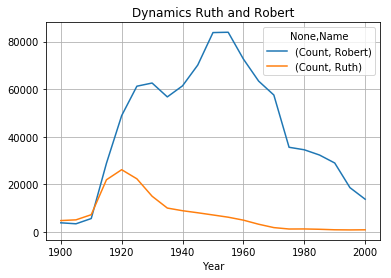

In [164]:
# График изменения количества имен Ruth и Robert с 1900 по 2000.
names_group.query('Name == ["Ruth", "Robert"]').unstack('Name').plot(title='Dynamics Ruth and Robert', grid=True)

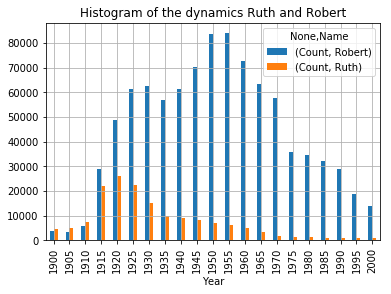

In [165]:
# 2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
names_group.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar(
    title='Histogram of the dynamics Ruth and Robert', grid=True)

In [166]:
# 3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
year = 1950
names_on_R  = pd.read_csv(f'{DATA_PATH}/yob{year}.txt',names=['Name','Pol','Count'])
names_on_R_pie = R_names.query('Name.str[0] == "R"').groupby('Name').sum().sort_values(by='Count', ascending=False).head(20)

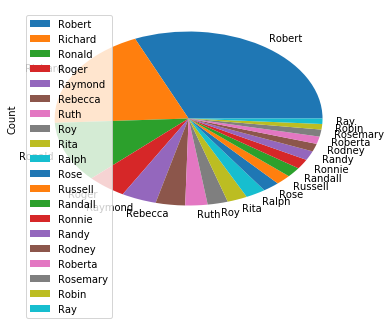

In [167]:
names_on_R_pie.plot.pie(y='Count')

In [144]:
# 4. Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. 
# Сгруппируем данные по имени и отсортируем их по кол-ву:
names_group = all_names.groupby('Name').sum().sort_values(by='Count', ascending=False).reset_index()

In [145]:
# Будем находить гласные буквы (aeiuyo) и их исключать, т.к. гласных букв меньше, чем согласных. 
# Так найдем количество согласных букв в каждом имени.
# Функция возвращает сумму согласных букв += 1, если в строке нет гласных и 0, если они есть
def without_vowels(name):
    return sum([1 if a not in 'AEIUYO' + 'aeiuyo' else 0 for a in name])

In [146]:
# Проверка правильности подсчета согласных букв
without_vowels('Margaret')

5

In [147]:
# Способ 2. Напишем функцию, подсчитывающую согласные буквы в имени:
consonants = 'BCDFGHJKLMNPQRSTVWXZ' + 'bcdfghjklmnpqrstvwxz'
def with_consonants(name):
    count = 0
    for a in consonants:
        count += name.count(a)
    return count
#     return sum([1 if a in 'BCDFGHJKLMNPQRSTVWXZ' + 'bcdfghjklmnpqrstvwxz' else 0 for a in name])

In [148]:
# Проверка правильности подсчета согласных букв
with_consonants('Margaret')

5

In [158]:
names_group['Count of consonants'] = names_group.apply(lambda row: without_vowels(row.Name), axis=1)

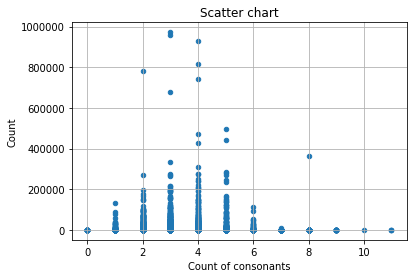

In [159]:
# Посторение точечной диаграммы
names_group.plot.scatter(x='Count of consonants', y='Count', title='Scatter chart', grid=True)

In [160]:
names_group['Count of consonants'] = names_group.apply(lambda row: without_vowels(row.Name), axis=1)

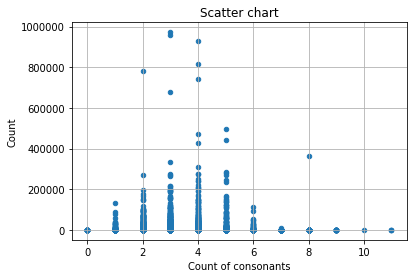

In [161]:
# Построение точечной диаграммы (функция из 2ого способа)
names_group.plot.scatter(x='Count of consonants', y='Count', title='Scatter chart', grid=True)